<a href="https://colab.research.google.com/github/roshi45/CODSOFT/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_test =  pd.read_csv('/content/drive/MyDrive/Internship/Task2/fraudTest.csv')
df_train =  pd.read_csv('/content/drive/MyDrive/Internship/Task2/fraudTrain.csv')

**Preprocessing**

In [ ]:
print(len(df_train), len(df_test))

1296675 555719


In [ ]:
df_complete = pd.concat([df_train, df_test])
len(df_complete)

1852394

In [ ]:
df_complete.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df_complete.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
df_complete.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_fraud'>

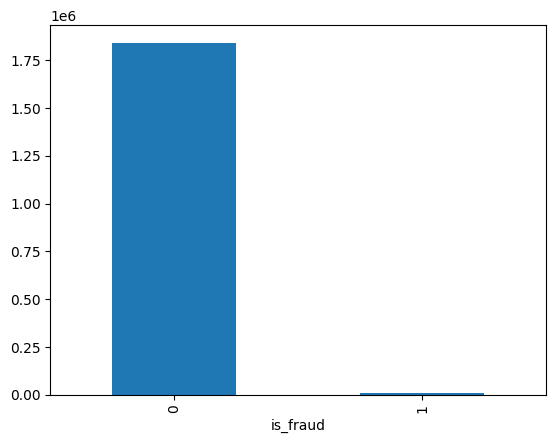

In [ ]:
df_complete.groupby('is_fraud').count()['cc_num'].plot.bar()

In [ ]:
fraud = df_complete[df_complete['is_fraud'] == 1]
non_fraud = df_complete[df_complete['is_fraud'] == 0]

print(len(fraud), len(non_fraud))

9651 1842743


In [ ]:
df_complete.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
df_complete.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [ ]:
df_complete.isna().sum().sum()

0

In [ ]:
df_complete.duplicated().sum()

0

<Axes: >

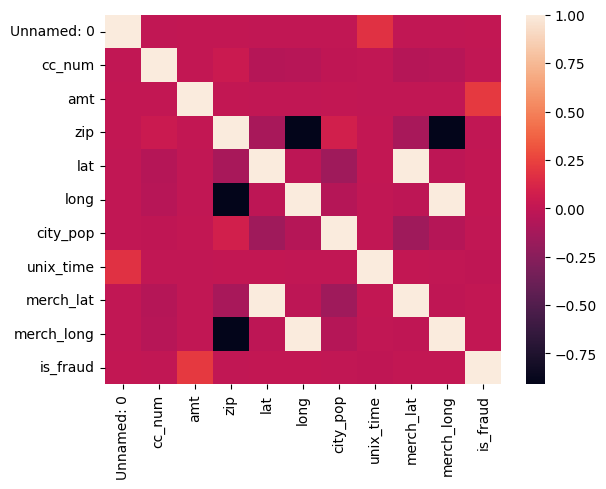

In [ ]:
sns.heatmap(df_complete[[i for i in df_complete.columns\
                         if df_complete[i].dtype == 'int64' \
                            or df_complete[i].dtype == 'float64']]\
                            .corr())

In [ ]:
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)])

In [ ]:
df_balanced.shape

(19302, 23)

<Axes: xlabel='is_fraud'>

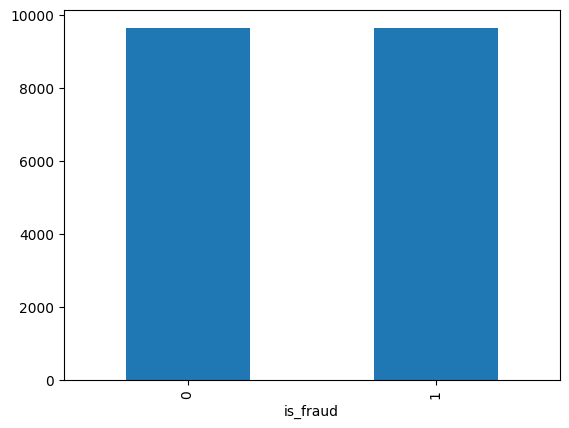

In [ ]:
df_balanced.groupby('is_fraud').count()['cc_num'].plot.bar()

In [ ]:
columns_dropped = ['Unnamed: 0',
                   'merchant',
                   'cc_num',
                   'first',
                   'last',
                   'gender',
                   'trans_num',
                   'unix_time',
                   'street',
                   'merch_lat',
                   'merch_long',
                   'job',
                   'zip',
                   ]

In [ ]:
df_balanced['trans_date_trans_time'] = pd.to_datetime(df_balanced['trans_date_trans_time'])
df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])

In [ ]:
df_balanced['trans_date_trans_time'] = df_balanced['trans_date_trans_time'].dt.hour

In [ ]:
df_balanced = df_balanced.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

In [ ]:
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'night'
    return ans

In [ ]:
df_balanced['hour_transaction'] = df_balanced.apply(get_tod, axis = 1)

In [ ]:
df_balanced.head()

,Unnamed: 0,hour_transaction,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,night,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,night,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,night,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,night,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,night,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [ ]:
df_balanced['dob']= df_balanced['dob'].dt.year
df_balanced = df_balanced.rename(columns = {'dob': 'age'})

In [ ]:
from datetime import datetime
df_balanced['age'] = datetime.now().year - df_balanced['age']

In [ ]:
df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

age
19      7
20     32
21     21
22     12
23     58
       ..
96     41
97     54
98     33
99     11
100     7
Name: is_fraud, Length: 82, dtype: int64

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        19302 non-null  int64  
 1   hour_transaction  19302 non-null  object 
 2   cc_num            19302 non-null  int64  
 3   merchant          19302 non-null  object 
 4   category          19302 non-null  object 
 5   amt               19302 non-null  float64
 6   first             19302 non-null  object 
 7   last              19302 non-null  object 
 8   gender            19302 non-null  object 
 9   street            19302 non-null  object 
 10  city              19302 non-null  object 
 11  state             19302 non-null  object 
 12  zip               19302 non-null  int64  
 13  lat               19302 non-null  float64
 14  long              19302 non-null  float64
 15  city_pop          19302 non-null  int64  
 16  job               19302 non-null  object 

In [ ]:
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'\
                      or df_balanced[i].dtype =='int32' \
                      or df_balanced[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [ ]:
NUMERICAL_FEATURES

['Unnamed: 0',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'age',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [ ]:
CATEGORICAL_FEATURES

['hour_transaction',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

In [ ]:
df_balanced.head()

,Unnamed: 0,hour_transaction,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2.0,4613314721966,543.0,4.0,281.06,159.0,307.0,1.0,552.0,...,35.9946,-81.7266,885,428.0,36,17590.0,1325466397,36.430124,-81.179483,1
2472,2472,2.0,340187018810220,285.0,2.0,11.52,250.0,183.0,0.0,284.0,...,29.4400,-98.4590,1595797,229.0,64,14338.0,1325468849,29.819364,-99.142791,1
2523,2523,2.0,340187018810220,196.0,4.0,276.31,250.0,183.0,0.0,284.0,...,29.4400,-98.4590,1595797,229.0,64,14148.0,1325473523,29.273085,-98.836360,1
2546,2546,2.0,4613314721966,162.0,2.0,7.03,159.0,307.0,1.0,552.0,...,35.9946,-81.7266,885,428.0,36,4328.0,1325475483,35.909292,-82.091010,1
2553,2553,2.0,340187018810220,328.0,4.0,275.73,250.0,183.0,0.0,284.0,...,29.4400,-98.4590,1595797,229.0,64,9182.0,1325476547,29.786426,-98.683410,1


In [ ]:
df_balanced[['is_fraud', 'age']] = df_balanced[['is_fraud', 'age']].astype('float64')

<Axes: >

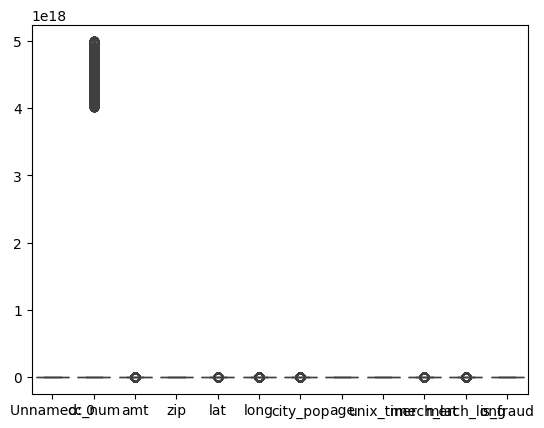

In [ ]:
sns.boxplot(df_balanced[NUMERICAL_FEATURES])

<Axes: >

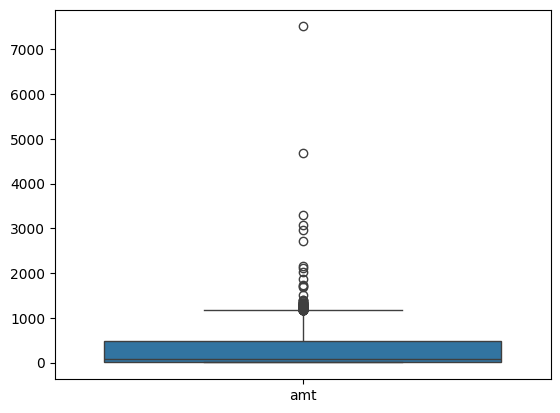

In [ ]:
sns.boxplot(df_balanced[['amt']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [ ]:
last_column = df_scaled.shape[1]-1

In [ ]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 9651
Fraud: 9651


In [ ]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,is_fraud
0,0.001877,1.0,9.119757e-07,0.784682,0.307692,0.037304,0.449153,0.63299,1.0,0.553106,...,0.342164,0.859026,0.000297,0.862903,0.209877,0.911352,0.001293,0.357164,0.857238,1.0
1,0.001895,1.0,6.812961e-05,0.411850,0.153846,0.001401,0.706215,0.37732,0.0,0.284569,...,0.201707,0.687801,0.549003,0.461694,0.555556,0.742863,0.001331,0.220433,0.676878,1.0
2,0.001934,1.0,6.812961e-05,0.283237,0.307692,0.036672,0.706215,0.37732,0.0,0.284569,...,0.201707,0.687801,0.549003,0.461694,0.555556,0.733019,0.001405,0.209134,0.679955,1.0
3,0.001952,1.0,9.119757e-07,0.234104,0.153846,0.000803,0.449153,0.63299,1.0,0.553106,...,0.342164,0.859026,0.000297,0.862903,0.209877,0.224237,0.001436,0.346392,0.848086,1.0
4,0.001957,1.0,6.812961e-05,0.473988,0.307692,0.036594,0.706215,0.37732,0.0,0.284569,...,0.201707,0.687801,0.549003,0.461694,0.555556,0.475727,0.001453,0.219751,0.681491,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
X = df_scaled.drop(columns = 'is_fraud')

y = df_scaled['is_fraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
def predict(model, test_set, threshold):
    predictions = model.predict(test_set)
    pred_threshold = model.predict_proba(test_set)
    test_set["prediction"] = predictions
    test_set["pred_threshold"] = (pred_threshold >= threshold)[:, 1].astype(float)
    return test_set

In [ ]:
predict(model, x_test, 0.4)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,prediction,pred_threshold
10529,0.337522,0.0,9.155166e-04,0.709538,0.923077,0.000032,0.209040,0.507216,0.0,0.525050,...,0.863930,0.030520,0.187500,0.209877,0.397078,0.267499,0.187703,0.863492,0.0,0.0
15361,0.581147,0.5,1.306864e-03,0.148844,0.153846,0.008027,0.446328,0.290722,0.0,0.960922,...,0.797742,0.001980,0.308468,0.654321,0.205948,0.440777,0.311025,0.782090,0.0,0.0
12160,0.058281,0.0,6.082869e-06,0.943642,0.769231,0.010819,0.389831,0.913402,1.0,0.291583,...,0.914594,0.000275,0.419355,0.283951,0.433501,0.771184,0.448062,0.912961,0.0,0.0
2953,0.369031,1.0,1.302244e-03,0.115607,0.384615,0.002729,0.175141,0.513402,0.0,0.298597,...,0.635407,0.004378,0.596774,0.222222,0.073830,0.287071,0.258523,0.639197,1.0,1.0
15870,0.784371,0.0,4.957639e-04,0.417630,0.000000,0.009766,0.497175,0.602062,1.0,0.151303,...,0.720395,0.000511,0.526210,0.148148,0.111393,0.574266,0.523393,0.711518,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17155,0.086463,0.0,5.449086e-04,0.101156,0.692308,0.000574,0.652542,0.985567,1.0,0.863727,...,0.979377,0.001101,0.330645,0.098765,0.051500,0.087069,0.533899,0.970745,0.0,0.0
17454,0.134150,0.5,9.636430e-01,0.576590,0.153846,0.006062,0.172316,0.703093,0.0,0.444890,...,0.732927,0.000254,0.733871,0.246914,0.685716,0.124684,0.360959,0.723537,0.0,0.0
12681,0.182415,1.0,1.233619e-07,0.293353,1.000000,0.001007,0.016949,0.068041,0.0,0.224449,...,0.832440,0.001172,0.282258,0.679012,0.381949,0.162606,0.262737,0.818254,0.0,1.0
15764,0.833405,0.0,8.771949e-01,0.326590,0.384615,0.000481,0.932203,0.447423,1.0,0.940882,...,0.444976,0.131228,0.086694,0.382716,0.853738,0.613600,0.382872,0.435964,0.0,0.0


In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
x_test["real"] = y_test["is_fraud"]

In [ ]:
x_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,prediction,pred_threshold,real
10529,0.337522,0.0,0.000916,0.709538,0.923077,0.000032,0.209040,0.507216,0.0,0.525050,...,0.030520,0.187500,0.209877,0.397078,0.267499,0.187703,0.863492,0.0,0.0,0.0
15361,0.581147,0.5,0.001307,0.148844,0.153846,0.008027,0.446328,0.290722,0.0,0.960922,...,0.001980,0.308468,0.654321,0.205948,0.440777,0.311025,0.782090,0.0,0.0,0.0
12160,0.058281,0.0,0.000006,0.943642,0.769231,0.010819,0.389831,0.913402,1.0,0.291583,...,0.000275,0.419355,0.283951,0.433501,0.771184,0.448062,0.912961,0.0,0.0,0.0
2953,0.369031,1.0,0.001302,0.115607,0.384615,0.002729,0.175141,0.513402,0.0,0.298597,...,0.004378,0.596774,0.222222,0.073830,0.287071,0.258523,0.639197,1.0,1.0,1.0
15870,0.784371,0.0,0.000496,0.417630,0.000000,0.009766,0.497175,0.602062,1.0,0.151303,...,0.000511,0.526210,0.148148,0.111393,0.574266,0.523393,0.711518,0.0,0.0,0.0


In [ ]:
print(classification_report(x_test['real'], x_test['prediction']))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      1932
         1.0       0.83      0.81      0.82      1929

    accuracy                           0.82      3861
   macro avg       0.82      0.82      0.82      3861
weighted avg       0.82      0.82      0.82      3861



In [ ]:
accuracy = accuracy_score(x_test['real'], x_test['prediction'])
precision = precision_score(x_test['real'], x_test['prediction'])
recall = recall_score(x_test['real'], x_test['prediction'])
f1 = f1_score(x_test['real'], x_test['prediction'])
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")


 Accuracy: 0.8218078218078219
 Precision: 0.8264071541294056
 Recall: 0.8144116122343183
 F1 Score: 0.8203655352480418


In [ ]:
print(classification_report(x_test['real'], x_test['pred_threshold']))

              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80      1932
         1.0       0.76      0.93      0.84      1929

    accuracy                           0.82      3861
   macro avg       0.84      0.82      0.82      3861
weighted avg       0.84      0.82      0.82      3861



In [ ]:
def confusion_matrix_plot(test_set, pred_label, model):
    cm = confusion_matrix(x_test['real'], x_test[pred_label], labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    plt.show()

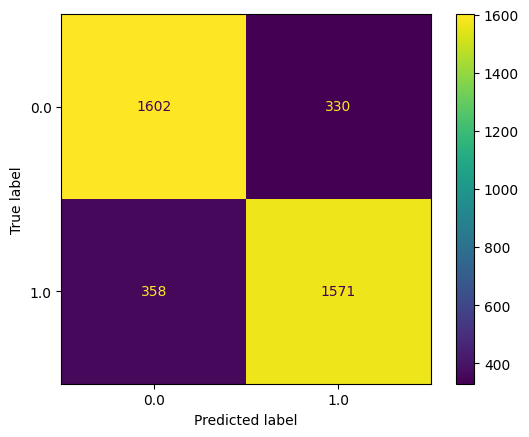

In [ ]:
confusion_matrix_plot(x_test, 'prediction', model)

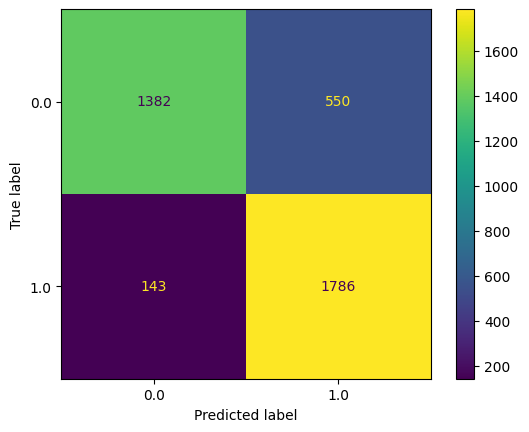

In [ ]:
confusion_matrix_plot(x_test, 'pred_threshold', model)

**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.shape
y.shape

(19302,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.5,random_state =0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
dtpred = dt.predict(x_test)

In [ ]:
print(dtpred)

[0. 0. 0. ... 0. 0. 1.]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(dtpred,y_test)
accuracy

0.9712983110558492

In [ ]:
dtcm = confusion_matrix(dtpred,y_test)
dtcm

array([[4718,  136],
       [ 141, 4656]])

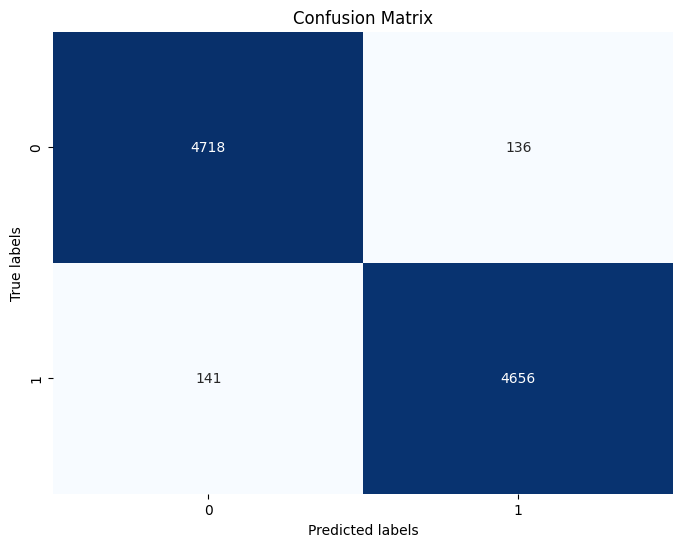

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(dtpred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=list(X.columns))

In [ ]:
print("DECISION TREE RULES:")
print(tree_rules)

DECISION TREE RULES:
|--- 5 <= -0.15
|   |--- 1 <= 0.17
|   |   |--- 5 <= -0.73
|   |   |   |--- 5 <= -0.78
|   |   |   |   |--- 5 <= -0.79
|   |   |   |   |   |--- 17 <= 0.24
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- 17 >  0.24
|   |   |   |   |   |   |--- 5 <= -0.79
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- 5 >  -0.79
|   |   |   |   |   |   |   |--- 15 <= -0.30
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- 15 >  -0.30
|   |   |   |   |   |   |   |   |--- 0 <= -0.74
|   |   |   |   |   |   |   |   |   |--- 11 <= -0.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- 11 >  -0.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- 0 >  -0.74
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- 5 >  -0.79
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- 5 >  -0.78
|   |   |   |   |--- 4 <

RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


In [ ]:
rf_classifier= RandomForestClassifier(n_estimators=500,random_state=100)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_predictions)
print(f"Random Forest Accuracy:{rf_accuracy: .4f}")

Random Forest Accuracy: 0.9614


In [ ]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1890   62]
 [  87 1822]]


In [ ]:
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")


 Accuracy: 0.9614089614089614
 Precision: 0.9670912951167728
 Recall: 0.9544264012572027
 F1 Score: 0.9607171104666491


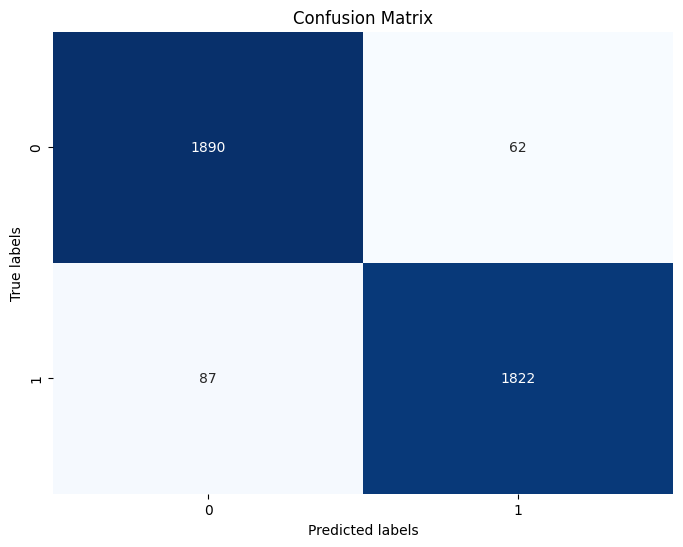

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

